In [27]:
%load_ext autoreload
%autoreload 2
from utils import *
import itertools
from IPython.display import display, HTML
from scipy.stats import spearmanr
from scipy.stats import pearsonr
ins = BrainSpan()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
Trans_TPM = "/Users/jiayao/Work/BrainDisorders/data/GTEx_Analysis_2016-01-15_v7_RSEMv1.2.22_transcript_tpm.txt"
out = open("transcripts/GTEx_rec_transcript_tpm.txt", 'wt')
for l in open(Trans_TPM, 'rt'):
    llist = l.strip().split("\t")
    if l.startswith("trans"):
        out.write(l)
    elif llist[1].split(".")[0] in GeneIDs:
        out.write(l)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jiayao/Work/BrainDisorders/data/GTEx_Analysis_2016-01-15_v7_RSEMv1.2.22_transcript_tpm.txt'

In [29]:
Trans_TPM = "/Users/jiayao/Work/BrainDisorders/data/GTEx/GTEx_Analysis_2016-01-15_v7_RSEMv1.2.22_transcript_tpm.txt"
out = open("transcripts/GTEx_VIP_SSC_rec_transcript_tpm.txt", 'wt')
for l in open(Trans_TPM, 'rt'):
    llist = l.strip().split("\t")
    if l.startswith("trans"):
        out.write(l)
    elif llist[1].split(".")[0] in GeneIDs:
        out.write(l)

In [30]:
SampleAtt = pd.read_csv("../data/GTEx_v7_Annotations_SampleAttributesDS.txt", delimiter="\t")
BrainSampleAtt = SampleAtt[SampleAtt["SMTS"]=="Brain"]

FileNotFoundError: File b'../data/GTEx_v7_Annotations_SampleAttributesDS.txt' does not exist

In [31]:
BrainSampleAtt["SAMPID"].values

NameError: name 'BrainSampleAtt' is not defined

In [32]:
Headers = ["transcript_id", "gene_id"]+list(BrainSampleAtt["SAMPID"].values)

NameError: name 'BrainSampleAtt' is not defined

In [33]:
Headers = [x for x in Headers]

NameError: name 'Headers' is not defined

In [34]:
print(len(Headers))

NameError: name 'Headers' is not defined

In [35]:
print(df.columns.values)

NameError: name 'df' is not defined

In [36]:
GTEx_rec_transcript_tpm = pd.read_csv("transcripts/GTEx_VIP_SSC_rec_transcript_tpm.txt", delimiter="\t")
print(GTEx_rec_transcript_tpm.shape)

(404, 11690)


In [37]:
GTExSamples = pd.read_csv("../data/GTEx/GTEx_v7_Annotations_SampleAttributesDS.txt", delimiter="\t")
BrainSamples = GTExSamples[GTExSamples["SMTS"]=="Brain"]["SAMPID"].values
MeasuredSamples = set(GTEx_rec_transcript_tpm.columns)
Header = ["transcript_id", "gene_id"] + [x for x in BrainSamples if x in MeasuredSamples]
GTExBrainTransTPM = GTEx_rec_transcript_tpm[Header]

In [38]:
GTExBrainTransTPM.shape

(404, 1673)

In [39]:
for i, row in GTExBrainTransTPM.iterrows():
    print(list(row[0:5]))
    break

['ENST00000257745.4', 'ENSG00000005483.15', 0.63, 5.88, 10.09]


In [40]:
Genes = LoadGTF4FracIso("unifiedmodel/RecLGDgenes.gencode.v19.gtf")
#Jiayao_features = LoadVar4FracIso2(Genes)
Jiayao_features = pd.read_csv(
    "unifiedmodel/features.jiayao.65.csv", delimiter=",")
Jiayao_features.loc[Jiayao_features["effectGene"]=="MLL5", "effectGene"] = "KMT2E"
Jiayao_features = LoadVar4FracIso(Jiayao_features, Genes)
GeneTransTPM = SummarizeTMPCrossSample(GTExBrainTransTPM, transform="log2")

In [41]:
GeneSYM2ID = {}
for k,v in Genes.items():
    GeneSYM2ID[k] = v.GeneID

In [42]:
def ExonsList2ENSExonID(row):
    ExonList = row["Exons"]
    ExonList = [exon.split(".")[0] for exon in ExonList]
    return ";".join(ExonList)
Jiayao_features["ENSExonIDs"] = Jiayao_features.apply(lambda row: ExonsList2ENSExonID(row), axis=1)

In [43]:
#Jiayao_features[["KEY", "ENSExonIDs"]].to_csv("../data/RecLGD2ENSExonID.txt", sep="\t", index=False)

In [44]:
FracIsoComs, pheno_diffs = SharedFracIsoNormPheno(Jiayao_features, GeneSYM2ID, GeneTransTPM)
PlotSharedIso(FracIsoComs, pheno_diffs)

AttributeError: 'list' object has no attribute 'split'

In [45]:
pearsonrs, spearmanrs = Permute(Jiayao_features, GeneSYM2ID, GeneTransTPM, pheno="NVIQ")
PlotHistAndP(pearsonrs, -0.52)

AttributeError: 'list' object has no attribute 'split'

In [46]:
GeneIDs, Genes = LoadGenesForSVIPSSC()
SSC_Genes = LoadGTF4FracIso("unifiedmodel/RecLGDgenes.gencode.v19.gtf")
VIP_Genes = LoadGTF4FracIso("unifiedmodel/VIPgenes.gencode.v19.gtf")
SSC_VIP_Genes = {}
for gene in SSC_Genes:
    if gene not in SSC_VIP_Genes:
        SSC_VIP_Genes[gene] = SSC_Genes[gene]
for gene in VIP_Genes:
    if gene not in SSC_VIP_Genes:
        SSC_VIP_Genes[gene] = VIP_Genes[gene]
SSC_VIPV4 = pd.read_csv(
    "data/SSC_SVIP.V4.RecGenes.LGD.txt", delimiter="\t")
SSC_VIPV4.loc[SSC_VIPV4["genetic_status"]=="MLL5", "genetic_status"] = "KMT2E"
SSC_VIPV4["effect_gene"] = SSC_VIPV4["genetic_status"]
SSC_VIPV4 = LoadVar4FracIso2(SSC_VIPV4, SSC_VIP_Genes)
GeneTransTPM = SummarizeTMPCrossSample(GTExBrainTransTPM, transform="log2")

In [47]:
#SSC_VIPV4

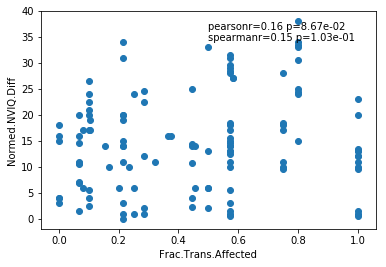

In [48]:
GeneSYM2ID = {}
for k,v in Genes.items():
    GeneSYM2ID[k] = v.GeneID
FracIsoComs, pheno_diffs = SharedFracIsoNormPheno(SSC_VIPV4, GeneSYM2ID, GeneTransTPM, 
                                                  pheno="composite_standard_score")
#print(FracIsoComs, pheno_diffs)
PlotSharedIso(FracIsoComs, pheno_diffs)

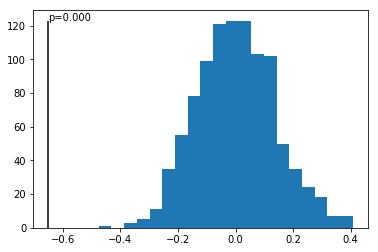

In [49]:
pearsonrs, spearmanrs = Permute(SSC_VIPV4, GeneSYM2ID, GeneTransTPM, pheno="composite_standard_score")
PlotHistAndP(pearsonrs, -0.65)

In [50]:
Group1, Group2 = [],[]
for frac, diff in zip(FracIsoComs, IQ_diffs):
    if frac > 0.4:
        Group2.append(diff)
    else:
        Group1.append(diff)
print(len(Group1), len(Group2))
print(np.mean(Group1), np.mean(Group2))
scipy.stats.mannwhitneyu(Group1, Group2)

NameError: name 'IQ_diffs' is not defined

In [51]:
Group1, Group2 = [],[]
for frac, diff in zip(FracIsoComs, IQ_diffs):
    if frac > 0.5:
        Group2.append(diff)
    else:
        Group1.append(diff)
print(len(Group1), len(Group2))
print(np.mean(Group1), np.mean(Group2))
scipy.stats.mannwhitneyu(Group1, Group2)

NameError: name 'IQ_diffs' is not defined

In [52]:
#Sim
N = 10000
DXX, DX, DY, DYY = [],[], [], []
Y1, Y2 = np.random.normal(100,15,N), np.random.normal(100,15,N)
#Trans = np.array(range(1,11))
fix_ni = 5
ni_memo=[]
for i in range(N):
    if fix_ni is None:
        ni = round(10**np.random.normal(1,0.5))+2
    else:
        ni = fix_ni
    Trans = np.arange(ni)
    X1 = np.random.choice(Trans, size=np.random.randint(1,ni,1), replace=False)
    X2 = np.random.choice(Trans, size=np.random.randint(1,ni,1), replace=False)
    #Yn1, Yn2 = max(0, 100-Y1[i])/(len(X1)/ni), max(0, 100-Y2[i])/(len(X2)/ni)
    Yn1, Yn2 = max(0, 150-Y1[i])/(len(X1)/ni), max(0, 150-Y2[i])/(len(X2)/ni)
    Dy = abs(Yn1-Yn2)
    Dx = len(set(X1).intersection(set(X2)))/ni
    DYY.append(abs(Y1[i]-Y2[i]))
    DY.append(Dy)
    DX.append(Dx)
    DXX.append(1-abs(len(X1)-len(X2))/ni)
    #DXX.append(abs(len(X1)-len(X2))/ni)
    #print(X1, X2)
    ni_memo.append(ni)
print(pearsonr(DX,DYY), spearmanr(DX,DYY));
print(pearsonr(DX,DY), spearmanr(DX,DY));
print(pearsonr(DXX,DY), spearmanr(DXX,DY));

(-0.022416015835577584, 0.024987041933668044) SpearmanrResult(correlation=-0.02438811964615417, pvalue=0.014733275144476808)
(-0.4415936219006352, 0.0) SpearmanrResult(correlation=-0.4699947816305603, pvalue=0.0)
(-0.5340187072115957, 0.0) SpearmanrResult(correlation=-0.5323926446381135, pvalue=0.0)


(array([232.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 988.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
 <a list of 10 Patch objects>)

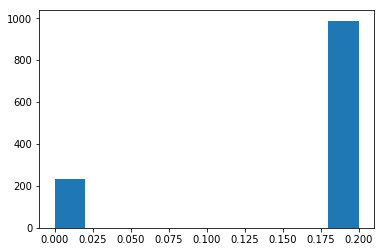

In [53]:
dist = []
for X1, X2 in zip(DX, DXX):
    if X2== 0.4:
        dist.append(X1)
plt.hist(dist)

(array([    0.,     0.,     0.,     0.,     0., 10000.,     0.,     0.,
            0.,     0.]),
 array([0.19897, 0.29897, 0.39897, 0.49897, 0.59897, 0.69897, 0.79897,
        0.89897, 0.99897, 1.09897, 1.19897]),
 <a list of 10 Patch objects>)

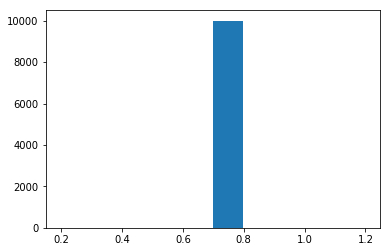

In [54]:
plt.hist(np.log10(ni_memo))

In [55]:
#plt.scatter(DXX, DX)
#plt.show()
#plt.scatter(DXX, DY)
#plt.show()
#plt.scatter(DX, DY)
#plt.show()

In [56]:
AndyMap = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/Andy-VIP/_Simons_LGD_isoform_map.csv")
AndyMapSSC = AndyMap[AndyMap["source"]=="ssc"]
GeneCount = AndyMapSSC.groupby("gene_id")["gene_id"].count()
AndyMapSSC["GeneCount"] = AndyMapSSC.apply(lambda row: GeneCount[row["gene_id"]], axis=1)
AndyMapSSC = AndyMapSSC[AndyMapSSC["GeneCount"]>=2].copy()

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [57]:
ind2iso = {}
for i, row in AndyMap.iterrows():
    ind = row["ind"]
    if 'p1' not in ind and row["source"]=="ssc":
        continue
    #ind = int(ind.split(".")[0])
    if row["source"]=="ssc":
        ind = str(float(ind.split(".")[0]))
        #print(ind)
    else:
        ind = ind
    ind2iso[ind] = row["iso"].split(";")

In [58]:
Jiayao_features.head(2)

,KEY,familyId,vcfVariant,inChild,effectGene,effectType,gender,FSIQ,VIQ,NVIQ,...,Rel.exp.postnatal,Prenatal.Bias,phyloP100way,phastCons100way,gender1,Age,Dosage,Exons,Transcripts,ENSExonIDs
0,13545-20:49509095,13545,20:49509094:G:GT,pM,ADNP,frame-shift,M,30.0,23.0,38.0,...,1.32567,1.423534,2.813101,0.732081,1,61.0,56.455400,"[ENSE00001523629.2, ENSE00001455631.1]","[ENST00000371602, ENST00000349014, ENST0000039...",ENSE00001523629;ENSE00001455631
1,12130-20:49510028,12130,20:49510027:CTT:C,pF,ADNP,frame-shift,F,54.0,62.0,55.0,...,1.32567,1.423534,2.813101,0.732081,2,101.0,40.005218,"[ENSE00001523629.2, ENSE00001455631.1]","[ENST00000371602, ENST00000349014, ENST0000039...",ENSE00001523629;ENSE00001455631


In [59]:
DF = Jiayao_features.copy(deep=True)
for i, row in DF.iterrows():
    ind = row["familyId"]
    #print(ind2iso[ind])
    DF.loc[i, "Transcripts"] = ";".join(ind2iso[ind])

KeyError: 13545

In [60]:
FracIsoComs, pheno_diffs = SharedFracIsoNormPheno(DF, GeneSYM2ID, GeneTransTPM)
PlotSharedIso(FracIsoComs, pheno_diffs)

AttributeError: 'list' object has no attribute 'split'

In [61]:
#FracIsoComs, pheno_diffs = SharedFracIsoNormPheno(DF, GeneSYM2ID, GeneTransTPM, SameExon=True)
#PlotSharedIso(FracIsoComs, pheno_diffs)

In [62]:
SSC_VIPV4

,Cohort,composite_standard_score,genetic_status,inheritance_status,location,sex,sfari_id,effect_gene,Exons,Transcripts,effectGene
0,SSC,53.000000,ADNP,de-novo,20:49509094-49509094,M,13545.0,ADNP,ENSE00001523629.2;ENSE00001455631.1,ENST00000371602;ENST00000349014;ENST0000039602...,ADNP
1,SSC,67.000000,ADNP,de-novo,20:49510027-49510029,F,12130.0,ADNP,ENSE00001523629.2;ENSE00001455631.1,ENST00000371602;ENST00000349014;ENST0000039602...,ADNP
2,SSC,77.000000,ANK2,de-novo,4:114232545-114232545,M,12645.0,ANK2,ENSE00003517727.1,ENST00000503271;ENST00000506722;ENST0000039453...,ANK2
3,SSC,88.000000,ANK2,de-novo,4:114251469-114251469,M,14256.0,ANK2,ENSE00001695957.1,ENST00000503271;ENST00000506722;ENST0000051496...,ANK2
4,SSC,71.000000,ANK2,de-novo,4:114277599-114277600,M,13768.0,ANK2,ENSE00001003852.1,ENST00000357077;ENST00000264366,ANK2
5,SSC,80.000000,ANKRD11,de-novo,16:89350771-89350775,M,12507.0,ANKRD11,ENSE00003474344.1,ENST00000378330;ENST00000301030,ANKRD11
6,SSC,76.000000,ANKRD11,de-novo,16:89351042-89351047,F,13905.0,ANKRD11,ENSE00003474344.1,ENST00000378330;ENST00000301030,ANKRD11
7,SSC,64.000000,ARID1B,de-novo,6:157510805-157510805,F,14393.0,ARID1B,ENSE00001142078.1,ENST00000275248;ENST00000350026;ENST0000041467...,ARID1B
8,SSC,58.000000,ARID1B,de-novo,6:157527664-157527668,F,13447.0,ARID1B,ENSE00001204918.4;ENSE00001348846.4;ENSE000020...,ENST00000275248;ENST00000350026;ENST0000041467...,ARID1B
9,SSC,57.000000,CHD2,de-novo,15:93524060-93524064,F,13618.0,CHD2,ENSE00001097780.1,ENST00000394196;ENST00000557381,CHD2


In [63]:
DF = SSC_VIPV4.copy(deep=True)
for i, row in DF.iterrows():
    ind = str(row["sfari_id"])
    #print(ind2iso[ind])
    DF.loc[i, "Transcripts"] = ";".join(ind2iso[ind])

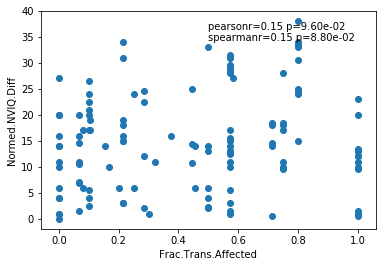

In [64]:
FracIsoComs, pheno_diffs = SharedFracIsoNormPheno(DF, GeneSYM2ID, GeneTransTPM, 
                                                  pheno="composite_standard_score")
#print(FracIsoComs, pheno_diffs)
PlotSharedIso(FracIsoComs, pheno_diffs)

In [65]:
Andy_overlap = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/Andy-VIP/DEBUG_isoform_overlap_log.csv")
pair2x = {}
for i, row in Andy_overlap.iterrows():
    ind1 = row["id1"]
    ind2 = row["id2"]
    if "pF" or "pM" in 
    
Andy_overlap.head(2)

SyntaxError: invalid syntax (<ipython-input-65-89cc89ac8c0a>, line 6)